## Import des bibliothéques

In [1]:
import pulp
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import DataFrame

## Création du Dataset de départ

In [35]:
centralesSUD = ['bagasse1', 'bagasse2', 'bagasse3', 'hydro', 'solaire', 'bio', 'eolien', 'importNord']


# euros / MWh - coûts marginaux
costSUD = 3*[40] + 4*[0] + [0]

# euros / MWh - coûts de démarrage
costSUD_startup = 3*[50000] + 4*[0] + [0] 
 

dataSUD = pd.DataFrame([[10, 10, 10, 0, 0, 0, 0, -100000], [33, 33, 33, 134, 115, 4, 16, 100000], [6, 6, 6, 0, 0, 0, 0, 0], costSUD, costSUD_startup], 
                       columns = centralesSUD, index = ['Pmin', 'Pmax', 'durationMIN', 'costMarginal', 'costStartUp'])
#print(dataSUD)

minNORD = 3*[10] + 2*[15] + 12*[0] + [0] + [-100000]
maxNORD = 3*[37] + 2*[40] + 12*[18] + [58] + [100000]

durationMIN_NORD = 3*[6] + 2*[1] + 12*[1] + [0] + [0]

# euros / MWh - coûts marginaux
costNORD = 3*[40] + 2*[150] + 12*[80] + [0] + [0]

# euros / MWh - coûts démarrage
costNORD_startup = 3*[50000] + 2*[2000] + 12*[1000] + [0] + [0]

centralesNORD = ['bagasse1', 'bagasse2', 'bagasse3', 'TAC1', 'TAC2', 'diesel1', 'diesel2', 'diesel3', 'diesel4', 'diesel5', 
                 'diesel6', 'diesel7', 'diesel8', 'diesel9', 'diesel10', 'diesel11', 'diesel12', 'solaire', 'importSud']

dataNORD = pd.DataFrame([minNORD, maxNORD, durationMIN_NORD, costNORD, costNORD_startup], 
                        columns = centralesNORD, index = ['Pmin', 'Pmax', 'durationMIN', 'costMarginal', 'costStartUp'])
#print(dataNORD)

## La demande Nord / Sud

In [36]:
dNord = np.loadtxt(fname="dataNord.csv", delimiter=",")

In [37]:
#dNord
dSud = np.loadtxt(fname="dataSud.csv", delimiter=",")

In [38]:
dNord2 = np.loadtxt(fname="dataNord2.csv", delimiter=",")
dSud2 = np.loadtxt(fname="dataSud2.csv", delimiter=",")

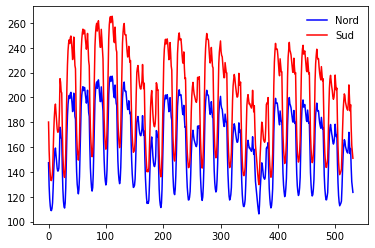

In [39]:
# demand expressed hour by hour
demand_Nord = dNord2
# [116.3034,
# 113.25285,
# 108.90945,
# 104.8626,
# 110.655,
# 120.4857,
# 129.7341,
# 137.4372,
# 145.0116,
# 142.57845,
# 136.7397,
# 131.5557,
# 128.9304,
# 128.38455,
# 130.7223,
# 136.7514,
# 154.4481,
# 156.0933,
# 155.4471,
# 159.732,
# 139.0653,
# 122.98365,
# 114.4098,
# 109.4526,
# 107.7435,
# 109.0044,
# 113.65425,
# 121.1544,
# 136.65195,
# 157.3803,
# 166.4685,
# 173.37915,
# 178.3224,
# 177.345,
# 178.6968,
# 180.8667,
# 178.11135,
# 173.12715,
# 168.3963,
# 167.62185,
# 179.6148,
# 177.30765,
# 171.8667,
# 171.7965,
# 150.5763,
# 132.83145,
# 122.87745,
# 117.86355,
# 113.80635,
# 114.47865,
# 118.92195,
# 126.6147,
# 144.15795,
# 168.0102,
# 178.91865,
# 184.7448,
# 187.9506,
# 183.54015,
# 184.9626,
# 187.47945,
# 184.5243,
# 178.7238,
# 172.26,
# 169.0281,
# 180.3834,
# 178.26435,
# 172.8936,
# 172.46565,
# 150.78105,
# 132.8247,
# 123.42195,
# 117.7155,
# 115.0218,
# 115.92945,
# 119.92635,
# 128.214,
# 145.59165,
# 167.0418,
# 177.516,
# 182.33955,
# 186.23835,
# 181.39725,
# 181.62945,
# 184.29075,
# 181.48005,
# 175.49145,
# 171.33165,
# 169.10775,
# 179.2332,
# 174.6963,
# 169.8597,
# 169.4853,
# 147.6288,
# 131.23035,
# 121.00995,
# 115.4862,
# 113.00445,
# 114.19695,
# 119.23155]

#[116.3034, 113.25285, 108.90945, 104.8626, 110.655, 120.4857, 129.7341, 137.4372, 145.0116,
#142.57845, 136.7397, 131.5557, 128.9304, 128.38455, 130.7223, 136.7514, 154.4481, 156.0933, 155.4471, 159.732] change the values so they are relevant to yours

#print(len(demand_Nord))
#print(demand_Nord[2])

demand_Sud = dSud2
# [142.1486,
# 138.42015,
# 133.11155,
# 128.1654,
# 135.245,
# 147.2603,
# 158.5639,
# 167.9788,
# 177.2364,
# 174.26255,
# 167.1263,
# 160.7903,
# 157.5816,
# 156.91445,
# 159.7717,
# 167.1406,
# 188.7699,
# 190.7807,
# 189.9909,
# 195.228,
# 169.9687,
# 150.31335,
# 139.8342,
# 133.7754,
# 131.6865,
# 133.2276,
# 138.91075,
# 148.0776,
# 167.01905,
# 192.3537,
# 203.4615,
# 211.90785,
# 217.9496,
# 216.755,
# 218.4072,
# 221.0593,
# 217.69165,
# 211.59985,
# 205.8177,
# 204.87115,
# 219.5292,
# 216.70935,
# 210.0593,
# 209.9735,
# 184.0377,
# 162.34955,
# 150.18355,
# 144.05545,
# 139.09665,
# 139.91835,
# 145.34905,
# 154.7513,
# 176.19305,
# 205.3458,
# 218.67835,
# 225.7992,
# 229.7174,
# 224.32685,
# 226.0654,
# 229.14155,
# 225.5297,
# 218.4402,
# 210.54,
# 206.5899,
# 220.4686,
# 217.87865,
# 211.3144,
# 210.79135,
# 184.28795,
# 162.3413,
# 150.84905,
# 143.8745,
# 140.5822,
# 141.69155,
# 146.57665,
# 156.706,
# 177.94535,
# 204.1622,
# 216.964,
# 222.85945,
# 227.62465,
# 221.70775,
# 221.99155,
# 225.24425,
# 221.80895,
# 214.48955,
# 209.40535,
# 206.68725,
# 219.0628,
# 213.5177,
# 207.6063,
# 207.1487,
# 180.4352,
# 160.39265,
# 147.90105,
# 141.1498,
# 138.11655,
# 139.57405,
# 145.72745]

#[142.1486, 138.42015, 133.11155, 128.1654, 135.245, 147.2603, 158.5639, 167.9788, 177.2364, 174.26255, 167.1263,
#160.7903, 157.5816, 156.91445, 159.7717, 167.1406, 188.7699, 190.7807, 189.9909, 195.228] # change the values so they are relevant to yours

#print(len(demand_Sud))
#print(demand_Sud[2])

# a simple graphical visualisation of the demand
plt.plot(demand_Nord,'b', label = 'Nord')
plt.plot(demand_Sud, 'r', label = 'Sud')
plt.legend(frameon=False)

## Variables

In [40]:
xSUD = 8*[len(demand_Sud)*[0]]  # 7 moyens de prod et 20 heures dans la journée choisie

for k in range(7):
    xSUD[k] = [pulp.LpVariable("xSUD_" + dataSUD.columns[k] + "_" + f"{i + 1}", 0, dataSUD[dataSUD.columns[k]]['Pmax']) for i in range(0, len(demand_Sud))]
xSUD[7] = [pulp.LpVariable("xSUD_" + dataSUD.columns[7] + "_" + f"{i + 1}", dataSUD[dataSUD.columns[7]]['Pmin'], dataSUD[dataSUD.columns[7]]['Pmax']) for i in range(0, len(demand_Sud))]
#xSUD[7] = [pulp.LpVariable("xSUD_" + dataSUD.columns[7] + "_" + f"{i + 1}", dataSUD[dataSUD.columns[7]]['Pmin'], 10000000) for i in range(0, len(demand_Sud))]


#print(len(xSUD[3]))  # hydro1 pour 20 heures pour SUD

xNORD = 19*[len(demand_Nord)*[0]]  # 18 moyens de prod et 20 heures dans la journée choisie

for k in range(18):
    xNORD[k] = [pulp.LpVariable("xNORD_" + dataNORD.columns[k] + "_" + f"{i + 1}", 0, dataNORD[dataNORD.columns[k]]['Pmax']) for i in range(0, len(demand_Nord))]
xNORD[18] = [pulp.LpVariable("xNORD_" + dataNORD.columns[18] + "_" + f"{i + 1}", dataNORD[dataNORD.columns[18]]['Pmin'], dataNORD[dataNORD.columns[18]]['Pmax']) for i in range(0, len(demand_Nord))]
#xNORD[18] = [pulp.LpVariable("xNORD_" + dataNORD.columns[18] + "_" + f"{i + 1}", dataNORD[dataNORD.columns[18]]['Pmin'], 10000000) for i in range(0, len(demand_Nord))]


onSud = 7*[len(demand_Sud)*[0]]
    
for i in range(0, 7):
    onSud[i] = [pulp.LpVariable(f"onSud_{i}_{t + 1}", cat=pulp.LpBinary) for t in range(0,len(demand_Sud))]

onNord = 18*[len(demand_Nord)*[0]]
    
for i in range(0, 18):
    onNord[i] = [pulp.LpVariable(f"onNord_{i}_{t + 1}", cat=pulp.LpBinary) for t in range(0,len(demand_Nord))]
    
    
#print(len(demand_Nord))  # TAC2 pour 20 heures pour NORD

## Contraintes

In [41]:
probNew = pulp.LpProblem("binetwork", pulp.LpMinimize)


################################################################ Satisfaire la Demande #######################################
for i in range(0, len(demand_Sud)):
    probNew += xSUD[0][i] + xSUD[1][i] + xSUD[2][i] + xSUD[3][i] + xSUD[4][i] + xSUD[5][i] + xSUD[6][i] + xSUD[7][i] == demand_Sud[i]
    
for i in range(0, len(demand_Nord)):
    probNew += xNORD[0][i] + xNORD[1][i] + xNORD[2][i] + xNORD[3][i] + xNORD[4][i] + xNORD[5][i] + xNORD[6][i] + xNORD[7][i] +xNORD[8][i] + xNORD[9][i] + xNORD[10][i] + xNORD[11][i] +xNORD[12][i] + xNORD[13][i] + xNORD[14][i] + xNORD[15][i] + xNORD[16][i] + xNORD[17][i] + xNORD[18][i] == demand_Nord[i]

    
###################################################### Solaire (quand il y a du soleil :) ########################################
for i in range(0, len(demand_Sud)):
    if (i%20 <8):
        probNew += xSUD[4][i] == 0
        probNew += xNORD[17][i] == 0

##################################################################################################################################
    
###################################################### Conditions sur Import / Export ############################################
# for i in range(0, len(demand_Sud)):
#     if(xSUD[0][i] + xSUD[1][i] + xSUD[2][i] + xSUD[3][i] + xSUD[4][i] + xSUD[5][i] + xSUD[6][i] >= demand_Sud[i] and xNORD[0][i] + xNORD[1][i] + xNORD[2][i] + xNORD[3][i] + xNORD[4][i] + xNORD[5][i] + xNORD[6][i] + xNORD[7][i] +xNORD[8][i] + xNORD[9][i] + xNORD[10][i] + xNORD[11][i] +xNORD[12][i] + xNORD[13][i] + xNORD[14][i] + xNORD[15][i] + xNORD[16][i] + xNORD[17][i] <= demand_Nord[i]):
#         probNew += xSUD[7][i] == -(xSUD[0][i] + xSUD[1][i] + xSUD[2][i] + xSUD[3][i] + xSUD[4][i] + xSUD[5][i] + xSUD[6][i] - demand_Sud[i])
#         probNew += xNORD[18][i] == -xSUD[7][i]

# for i in range(0, len(demand_Nord)):
#     if(xNORD[0][i] + xNORD[1][i] + xNORD[2][i] + xNORD[3][i] + xNORD[4][i] + xNORD[5][i] + xNORD[6][i] + xNORD[7][i] +xNORD[8][i] + xNORD[9][i] + xNORD[10][i] + xNORD[11][i] +xNORD[12][i] + xNORD[13][i] + xNORD[14][i] + xNORD[15][i] + xNORD[16][i] + xNORD[17][i] >= demand_Nord[i] and xSUD[0][i] + xSUD[1][i] + xSUD[2][i] + xSUD[3][i] + xSUD[4][i] + xSUD[5][i] + xSUD[6][i] <= demand_Sud[i]):
#         probNew += xNORD[18][i] == -(xNORD[0][i] + xNORD[1][i] + xNORD[2][i] + xNORD[3][i] + xNORD[4][i] + xNORD[5][i] + xNORD[6][i] + xNORD[7][i] +xNORD[8][i] + xNORD[9][i] + xNORD[10][i] + xNORD[11][i] +xNORD[12][i] + xNORD[13][i] + xNORD[14][i] + xNORD[15][i] + xNORD[16][i] + xNORD[17][i] - demand_Nord[i])
#         probNew += xSUD[7][i] == -xNORD[18][i] 
#     else :
#         probNew += xNORD[18][i] == 0
############################################################### On / OFF ###################################################
#           #           #              #             #          SUD 
for i in range(0, len(demand_Sud)):
    for j in range(7):
        probNew += xSUD[j][i] >= dataSUD[dataSUD.columns[j]]['Pmin'] * onSud[j][i]
        
        probNew += xSUD[j][i] <= dataSUD[dataSUD.columns[j]]['Pmax'] * onSud[j][i]
        
# #           #           #              #             #          NORD
for i in range(0, len(demand_Nord)):
    for j in range(18):
        
        probNew += xNORD[j][i] >= dataNORD[dataNORD.columns[j]]['Pmin'] * onNord[j][i]
        
        probNew += xNORD[j][i] <= dataNORD[dataNORD.columns[j]]['Pmax'] * onNord[j][i]

############################################################### Import / Export ###########################################        
for i in range(0, len(demand_Nord)):
    probNew += xSUD[7][i] + xNORD[18][i] == 0
    
################################################################ Durée minimale marche / arrêt SUD ################################################
for i in range(6, len(demand_Sud)):
    for j in range(3):
        if(onSud[j][i - 1] - ((1 - onSud[j][i - 1]) + (1 - onSud[j][i - 2]) + (1 - onSud[j][i - 3]) + (1 - onSud[j][i - 4]) + (1 - onSud[j][i - 5]) + (1 - onSud[j][i - 6]) - 5) >= 0):
            #print('hello 6 heures hihi')
            probNew += onSud[j][i] - onSud[j][i - 1] <= 0
        else:
            #print('hello else')
            probNew += onSud[j][i] - ((1 - onSud[j][i - 1]) + (1 - onSud[j][i - 2]) + (1 - onSud[j][i - 3]) + (1 - onSud[j][i - 4]) + (1 - onSud[j][i - 5]) + (1 - onSud[j][i - 6]) - 5) <= 0

for i in range(6, len(demand_Sud)):
    for j in range(3):
        if(onSud[j][i - 1] - (6 - ((onSud[j][i - 1]) + (onSud[j][i - 2]) + (onSud[j][i - 3]) + (onSud[j][i - 4]) + (onSud[j][i - 5]) + (onSud[j][i - 6]))) <= 0):
            probNew += onSud[j][i] - onSud[j][i - 1] >= 0
        else:
            probNew += onSud[j][i] - (6 - ((onSud[j][i - 1]) + (onSud[j][i - 2]) + (onSud[j][i - 3]) + (onSud[j][i - 4]) + (onSud[j][i - 5]) + (onSud[j][i - 6]))) >= 0

################################################################ Durée minimale marche / arrêt NORD ################################################
for i in range(6, len(demand_Nord)):
    for j in range(3):
        if(onNord[j][i - 1] - ((1 - onNord[j][i - 1]) + (1 - onNord[j][i - 2]) + (1 - onNord[j][i - 3]) + (1 - onNord[j][i - 4]) + (1 - onNord[j][i - 5]) + (1 - onNord[j][i - 6]) - 5) >= 0):
            probNew += onNord[j][i] - onNord[j][i - 1] <= 0
        else:
            probNew += onNord[j][i] - ((1 - onNord[j][i - 1]) + (1 - onNord[j][i - 2]) + (1 - onNord[j][i - 3]) + (1 - onNord[j][i - 4]) + (1 - onNord[j][i - 5]) + (1 - onNord[j][i - 6]) - 5) <= 0

for i in range(6, len(demand_Nord)):
    for j in range(3):
        if(onNord[j][i - 1] - (6 - (onNord[j][i - 1] + onNord[j][i - 2] + onNord[j][i - 3] + onNord[j][i - 4] + onNord[j][i - 5] + onNord[j][i - 6])) <= 0):
            probNew += onNord[j][i] - onNord[j][i - 1] >= 0
        else:
            probNew += onNord[j][i] - (6 - (onNord[j][i - 1] + onNord[j][i - 2] + onNord[j][i - 3] + onNord[j][i - 4] + onNord[j][i - 5] + onNord[j][i - 6])) >= 0

############################################################## Coût de StartUP ###########################################################################
costStartUp_Sud = 7*[len(demand_Sud)*[0]]
for j in range(7):
    for i in range(len(demand_Sud) - 1):
        if(onSud[j][i + 1] - onSud[j][i] >= 1):
            costStartUp_Sud[j][i] = dataSUD[dataSUD.columns[j]]['costStartUp'] * (onSud[j][i] - onSud[j][i - 1])
        else :
            costStartUp_Sud[j][i] = 0

costStartUp_Nord = 18*[len(demand_Nord)*[0]]
for j in range(18):
    for i in range(len(demand_Nord) - 1):
        if(onNord[j][i + 1] - onNord[j][i] >= 1):
            costStartUp_Nord[j][i] = dataNORD[dataNORD.columns[j]]['costStartUp'] * (onNord[j][i] - onNord[j][i - 1])
        else :
            costStartUp_Nord[j][i] = 0

############################################################## Fonction à minimizer ########################################################################################
probNew += sum(dataSUD[dataSUD.columns[j]]['costMarginal'] * xSUD[j][i] for i in range(0, len(demand_Sud)) for j in range(7)) + sum(dataNORD[dataNORD.columns[k]]['costMarginal'] * xNORD[k][p] for p in range(0, len(demand_Nord)) for k in range(18)) + sum(costStartUp_Sud[m][n] * xSUD[m][n] for m in range(7) for n in range(len(demand_Sud))) #+ sum(costStartUp_Nord[s][w] * xNORD[s][w] for s in range(18) for w in range(len(demand_Nord))) + sum((onSud[q][d] - onSud[q][d - 1]) * dataSUD[dataSUD.columns[q]]['costStartUp']  for d in range(0, len(demand_Sud)) for q in range(7)) + sum(xNORD[j][i] * dataNORD[dataNORD.columns[j]]['costStartUp']  for i in range(0, len(demand_Nord)) for j in range(19))


probNew.solve()
assert pulp.LpStatus[probNew.solve()] == 'Optimal'


## Les résultats

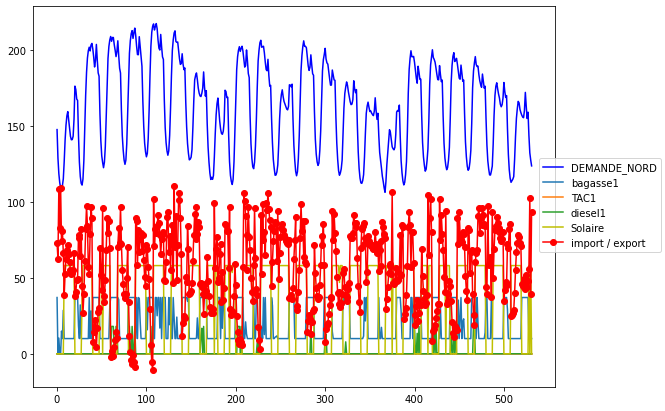

In [42]:
on_off_Sud  = 7*[100*[0]]
for j in range(0, 7):
    on_off_Sud[j] = [pulp.value(onSud[j][t]) for t in range(0,len(demand_Sud))]
#print(on_off_Sud)

on_off_Nord  = 18*[100*[0]]
for j in range(0, 18):
    on_off_Nord[j] = [pulp.value(onNord[j][t]) for t in range(0,len(demand_Nord))]


x2 = 19*[len(demand_Nord)*[0]]

for j in range(0, 19):
    x2[j] = [pulp.value(xNORD[j][t]) for t in range(0,len(demand_Nord))]
    
#print(x2[17])
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(demand_Nord, 'b', label  = 'DEMANDE_NORD')
ax.plot(x2[0], label = 'bagasse1')
#ax.plot(x2[1], label = 'bagasse2')
#ax.plot(x2[2], label = 'bagasse3')
ax.plot(x2[3], label = 'TAC1')
#ax.plot(x2[4], label = 'TAC2') 
ax.plot(x2[5], label = 'diesel1') 
# ax.plot(x2[6], label = 'diesel2') 
# ax.plot(x2[7],label = 'diesel3')
# ax.plot(x2[8], label = 'diesel4')
# ax.plot(x2[9], label = 'diesel5')
# ax.plot(x2[10], label = 'diesel6')
# ax.plot(x2[11], label = 'diesel7')
# ax.plot(x2[12], label = 'diesel8')
# ax.plot(x2[13], label = 'diesel9')
# ax.plot(x2[14], label = 'diesel10')
# ax.plot(x2[15], label = 'diesel11')
# ax.plot(x2[16], label = 'diesel12')
ax.plot(x2[17], 'y', label = 'Solaire')
ax.plot(x2[18], 'ro-', label = 'import / export')
fig.legend(loc="center right")
plt.subplots_adjust(right=0.85)
plt.show()
#print(x2[3])

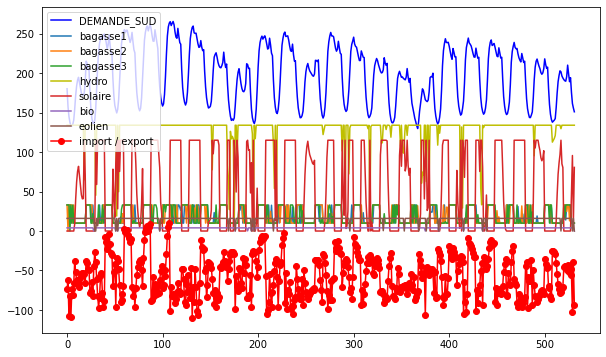

In [43]:
x1 = 8*[len(demand_Sud)*[0]]

for j in range(0, 8):
    x1[j] = [pulp.value(xSUD[j][t]) for t in range(0,len(demand_Sud))]
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.plot(demand_Sud, 'b', label = 'DEMANDE_SUD')
plt.plot(x1[0], label='bagasse1')
plt.plot(x1[1], label='bagasse2')
plt.plot(x1[2], label='bagasse3')
plt.plot(x1[3], 'y', label='hydro')
plt.plot(x1[4], label='solaire') 
plt.plot(x1[5], label='bio') 
plt.plot(x1[6], label = 'eolien') 
plt.plot(x1[7], 'ro-', label='import / export')
plt.legend(frameon=True)
plt.show()

#print(x1[7])

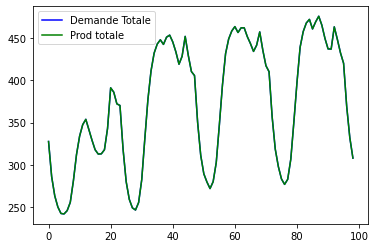

In [44]:
#plt.plot(demand_Nord + demand_Sud,'y', demand_Nord, 'b', demand_Sud, 'g')
demand_Total = 99*[0]
prodTotal_Sud = 99*[0]
prodTotal_Nord = 99*[0]
prodTotal = 99*[0]
for i in range(99):
    demand_Total[i] = demand_Sud[i] + demand_Nord[i]
    for j in range(8):
        prodTotal_Sud[i] += x1[j][i]
    for k in range(19):
        prodTotal_Nord[i] += x2[k][i]
    prodTotal[i] = prodTotal_Nord[i] + prodTotal_Sud[i]
plt.plot(demand_Total, 'b', label = 'Demande Totale')
plt.plot(prodTotal, 'g', label = 'Prod totale')
#plt.plot(prodTotal_Sud, 'y', label = 'prod Sud')
#plt.plot(prodTotal_Nord, 'r', label = 'prod Nord')
plt.legend(frameon=True)

In [45]:
print(probNew.objective.value())

3012640.680000001
